In [962]:
random_discoveries_path="/home/flowers-user/Downloads/adtool/discoveries"
imgep_discoveries_path="/home/flowers-user/adtool/discoveries"

In [963]:
# load discovery.json files in the directories
import json
import os
import sys
import re
import datetime

def load_discoveries(directory):
    # recursively load all discovery.json files in the directory
    discoveries_files = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file == "discovery.json":
                discoveries_files.append(os.path.join(root, file))
    # order the discoveries by time
   # print(discoveries_files)
    discoveries_files.sort(key=lambda x: os.path.getmtime(x))
    # load the discoveries
    discoveries = []
    for file in discoveries_files:
        with open(file, 'r') as f:
            discoveries.append(json.load(f)['output'])

    return discoveries

In [964]:
random_discoveries=load_discoveries(random_discoveries_path)
imgep_discoveries=load_discoveries(imgep_discoveries_path)

In [965]:
# convert to numpy arrays
import numpy as np
random_discoveries = np.array(random_discoveries)
imgep_discoveries = np.array(imgep_discoveries)

        Average distance  Standard deviation  Maximum distance  \
random          0.062135            0.067486          0.375832   
imgep           0.172014            0.110918          0.416773   

        Minimum distance  
random               0.0  
imgep                0.0  


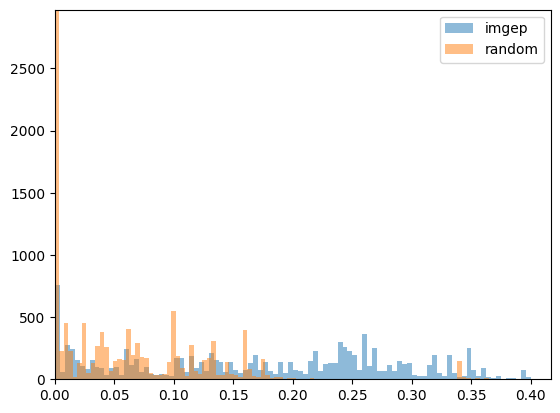

In [995]:
# random_discoveries.shape (252, 314)
# compute how diverse these 252 vectors are
# compute the distance matrix

min_len = min(random_discoveries.shape[0], imgep_discoveries.shape[0])

from sklearn.metrics.pairwise import euclidean_distances
distance_matrix = euclidean_distances(random_discoveries[:min_len])
distance_matrix_imgep = euclidean_distances(imgep_discoveries[:min_len])

# compute the average distance
average_distance = np.mean(distance_matrix)
average_distance_imgep = np.mean(distance_matrix_imgep)

# compute the standard deviation of the distance
std_distance = np.std(distance_matrix)
std_distance_imgep = np.std(distance_matrix_imgep)

# compute the maximum distance
max_distance = np.max(distance_matrix)
max_distance_imgep = np.max(distance_matrix_imgep)

# compute the minimum distance
min_distance = np.min(distance_matrix)
min_distance_imgep = np.min(distance_matrix_imgep)

# histogram of the distances
import matplotlib.pyplot as plt
plt.hist(distance_matrix_imgep.flatten(), bins=100, alpha=0.5, label='imgep')

plt.hist(distance_matrix.flatten(), bins=100, alpha=0.5, label='random')
plt.legend(loc='upper right')
# remove margins
plt.margins(0)
# remove white margins
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())

# add labels

#plt.title("Histogram of distances")
#plt.show()

# save the figure
plt.savefig('histogram_of_distances.png')

# plot a table with the statistics
import pandas as pd
data = {
    'Average distance': [average_distance, average_distance_imgep],
    'Standard deviation': [std_distance, std_distance_imgep],
    'Maximum distance': [max_distance, max_distance_imgep],
    'Minimum distance': [min_distance, min_distance_imgep],
    
}
df = pd.DataFrame(data, index=['random', 'imgep'])

print(df)
# save the table for latex
df.to_latex('table.tex')

#         Average distance  Standard deviation  Maximum distance  \
# random          0.062135            0.067486          0.375832   
# imgep           0.172014            0.110918          0.416773   

#         Minimum distance  
# random               0.0  
# imgep                0.0  

# Discussion:
# W


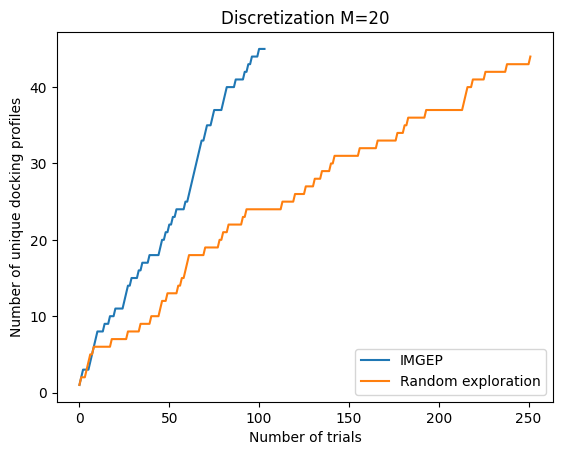

In [976]:
nb_buckets = 20

def bucket_id(embedding):
    bid=""
    # discretize each dimension into 100, values are between 0 and 1
    for i in range(0, len(embedding)):
        bid+="-"+str(int(embedding[i]*nb_buckets))
    return bid


random_buckets =set()
imgep_buckets =set()
random_bucket_lengths = []
imgep_bucket_lengths = []

for i in range(0, len(random_discoveries)):
    random_buckets.add(bucket_id(random_discoveries[i]))
    random_bucket_lengths.append(len(random_buckets))   
for i in range(0, len(imgep_discoveries)):
    imgep_buckets.add(bucket_id(imgep_discoveries[i]))
    imgep_bucket_lengths.append(len(imgep_buckets))


# plot the number of unique buckets with time
import matplotlib.pyplot as plt
plt.plot(imgep_bucket_lengths, label="IMGEP")
plt.plot(random_bucket_lengths, label="Random exploration")
plt.xlabel("Number of trials")
plt.ylabel("Number of unique docking profiles")
plt.title(f"Discretization M={nb_buckets}")
plt.legend()

#save the plot
plt.savefig(f"unique_buckets_{nb_buckets}.png")






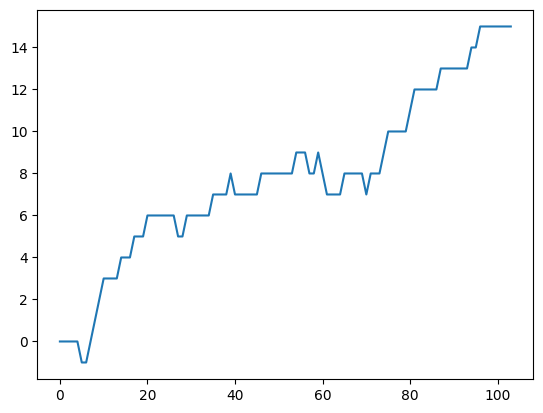

In [967]:
# plot the difference in the number of unique buckets with time
length=min(len(random_bucket_lengths), len(imgep_bucket_lengths))
diff = np.array(imgep_bucket_lengths)[:length] - np.array(random_bucket_lengths)[:length]
plt.plot(diff)


In [968]:
len(random_buckets), len(imgep_buckets), len(random_buckets.intersection(imgep_buckets))

(14, 25, 5)

In [969]:
len(random_discoveries[0])

314